In [4]:
# Лабораторная работа: Распознавание объектов по форме с использованием оператора Собеля

##Цель**: Разработать программу для распознавания фруктов (Бананы Lady Finger и Танжело) по их форме с использованием оператора Собеля.

#Этапы**:
#1. Загрузка и предварительная обработка изображений
#2. Преобразование в оттенки серого
#3. Применение оператора Собеля для выделения границ
#4. Анализ форм для распознавания
#5. Тестирование и оценка точности

In [5]:
# Импорт необходимых библиотек
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform, measure, morphology

In [14]:
def load_fruit_images(path_fruit1, path_fruit2, size=(256, 256)):
    """
    Загружает изображения фруктов из указанных папок
    Параметры:
        path_fruit1 - путь к папке с первым фруктом (бананы)
        path_fruit2 - путь к папке со вторым фруктом (танжело)
        size - размер, к которому будут приведены изображения
    Возвращает:
        (images_fruit1, images_fruit2) - кортеж со списками изображений
    """
    def load_from_folder(folder_path):
        images = []
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = io.imread(os.path.join(folder_path, file))
                    img = transform.resize(img, size)
                    images.append(img)
                except Exception as e:
                    print(f"Ошибка загрузки {file}: {str(e)}")
        return images
    
    print("Загрузка изображений...")
    fruit1 = load_from_folder(path_fruit1)
    fruit2 = load_from_folder(path_fruit2)
    print(f"Загружено {len(fruit1)} изображений первого фрукта")
    print(f"Загружено {len(fruit2)} изображений второго фрукта")
    return fruit1, fruit2

Файлы в папке: ['tangelo1.jpg', 'banana1.jpg', '.ipynb_checkpoints', 'lab1.ipynb']


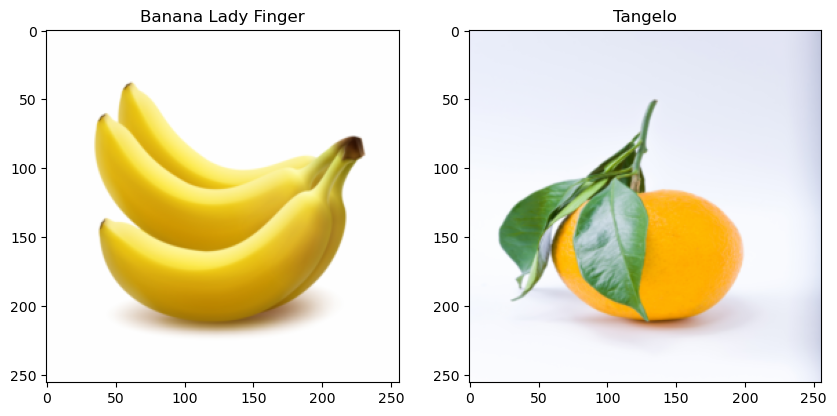

In [7]:
# Имена файлов с изображениями
banana_filename = "banana1.jpg"  # имя файла с изображением банана
tangelo_filename = "tangelo1.jpg"  # имя файла с изображением танжело (цитрусовый фрукт)

# Проверка наличия файлов в текущей директории
print("Файлы в папке:", os.listdir())  # выводим список всех файлов в текущей папке

# Функция для загрузки и предварительной обработки изображения
def load_image(filename, size=(256, 256)):
    try:
        # Пытаемся загрузить изображение
        img = io.imread(filename)  # чтение изображения с помощью skimage.io
        img = transform.resize(img, size)  # изменение размера изображения до 256x256 пикселей
        return img  # возвращаем обработанное изображение
    except Exception as e:
        # Если возникла ошибка при загрузке, выводим сообщение
        print(f"Ошибка загрузки {filename}: {str(e)}")
        return None  # возвращаем None в случае ошибки

# Загружаем изображения, используя нашу функцию
banana_img = load_image(banana_filename)  # загружаем изображение банана
tangelo_img = load_image(tangelo_filename)  # загружаем изображение танжело

# Проверка успешности загрузки изображений
if banana_img is not None and tangelo_img is not None:
    # Если оба изображения загружены успешно, создаем график для их отображения
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # создаем фигуру с 2 подграфиками
    
    # Отображаем изображение банана
    ax[0].imshow(banana_img)  # выводим изображение банана
    ax[0].set_title('Banana Lady Finger')  # устанавливаем заголовок
    
    # Отображаем изображение танжело
    ax[1].imshow(tangelo_img)  # выводим изображение танжело
    ax[1].set_title('Tangelo')  # устанавливаем заголовок
    
    plt.show()  # отображаем график
else:
    # Если хотя бы одно изображение не загрузилось, выводим сообщение об ошибке
    print("Не удалось загрузить изображения. Проверьте имена файлов.")

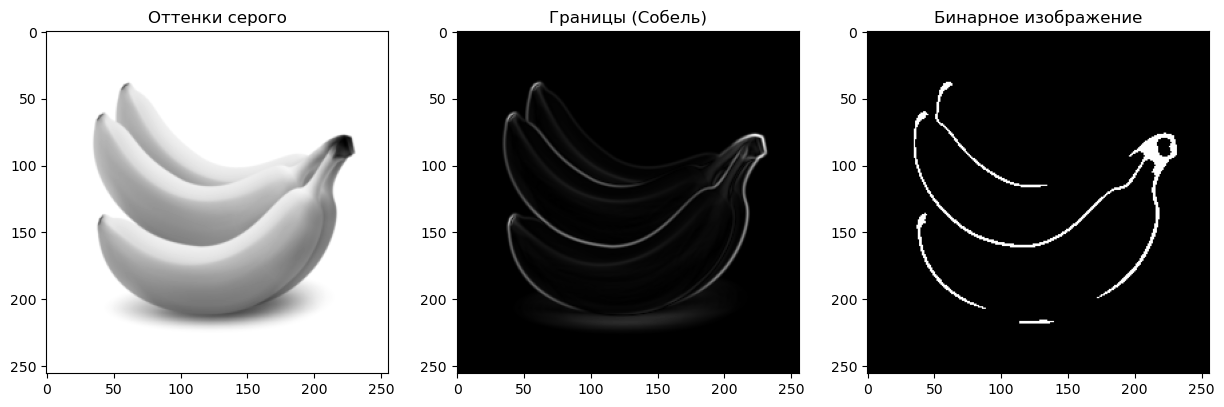

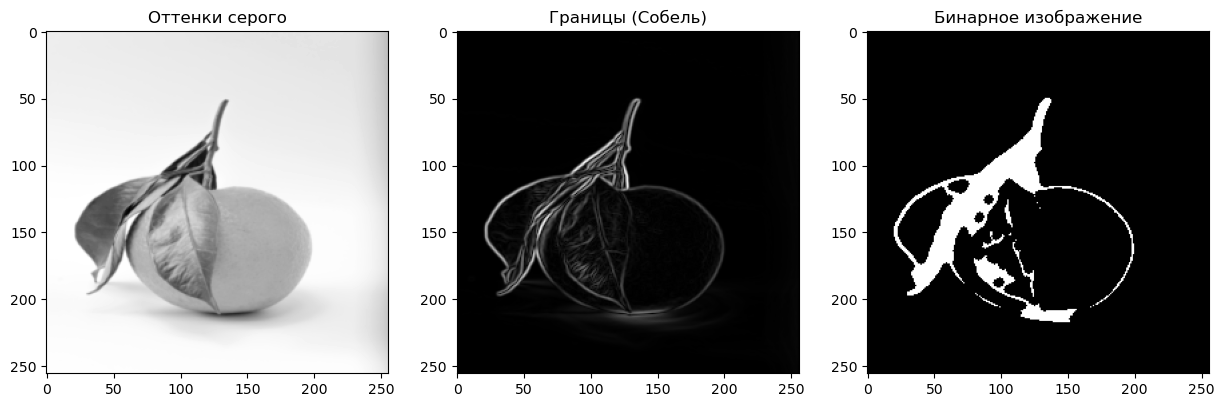

In [8]:
def process_image(img):
    """Функция обработки одного изображения, выполняющая последовательность преобразований"""
    try:
        # 1. Конвертация цветного изображения в оттенки серого
        # (преобразование из RGB в grayscale)
        gray = color.rgb2gray(img)
        
        # 2. Нормализация изображения (приведение значений к диапазону [0, 1])
        # Это помогает стандартизировать изображения для дальнейшей обработки
        gray = (gray - gray.min()) / (gray.max() - gray.min())
        
        # 3. Применение оператора Собеля для выделения границ
        # Оператор Собеля вычисляет приближенный градиент яркости изображения
        edges = filters.sobel(gray)
        
        # 4. Бинаризация (пороговая обработка) для выделения значимых границ
        # Все пиксели со значением > 0.1 становятся 1 (белые), остальные - 0 (черные)
        binary = edges > 0.1
        
        # 5. Морфологическая обработка - операция закрытия (заполнение мелких отверстий)
        # morphology.disk(3) создает круглый структурный элемент радиусом 3 пикселя
        binary = morphology.binary_closing(binary, morphology.disk(3))
        
        return gray, edges, binary
    except Exception as e:
        print(f"Ошибка обработки: {str(e)}")
        return None, None, None

# Обрабатываем изображение банана (если оно было успешно загружено)
# Проверяем существование переменной banana_img в глобальном пространстве имен
if 'banana_img' in globals() and banana_img is not None:
    # Получаем три варианта обработки изображения
    gray, edges, binary = process_image(banana_img)
    
    # Если обработка прошла успешно (gray не None)
    if gray is not None:
        # Создаем фигуру с тремя областями для отображения
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        # 1. Отображаем изображение в оттенках серого
        ax[0].imshow(gray, cmap='gray')
        ax[0].set_title('Оттенки серого')
        
        # 2. Отображаем выделенные границы (результат оператора Собеля)
        ax[1].imshow(edges, cmap='gray')
        ax[1].set_title('Границы (Собель)')
        
        # 3. Отображаем бинаризованное изображение после морфологической обработки
        ax[2].imshow(binary, cmap='gray')
        ax[2].set_title('Бинарное изображение')
        
        plt.show()  # Показываем все три изображения
        
# Аналогичная обработка для изображения танжело
if 'tangelo_img' in globals() and tangelo_img is not None:
    gray, edges, binary = process_image(tangelo_img)
    
    if gray is not None:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(gray, cmap='gray')
        ax[0].set_title('Оттенки серого')
        ax[1].imshow(edges, cmap='gray')
        ax[1].set_title('Границы (Собель)')
        ax[2].imshow(binary, cmap='gray')
        ax[2].set_title('Бинарное изображение')
        plt.show()

In [9]:
def analyze_shape(binary_img):
    """Анализ формы объекта на бинарном изображении
    
    Параметры:
        binary_img: ndarray - бинарное изображение (черно-белое, где объект - белый)
    
    Возвращает:
        float или None: значение эксцентриситета или None при ошибке
    """
    try:
        # 1. Маркировка связанных компонент (разделение объектов на изображении)
        # Каждый отдельный белый объект получает уникальную метку
        label_img = measure.label(binary_img)
        
        # 2. Вычисление свойств всех обнаруженных областей
        # measure.regionprops возвращает список объектов RegionProperties
        # с характеристиками каждой выделенной области
        regions = measure.regionprops(label_img)
        
        # Если не найдено ни одной области, возвращаем None
        if not regions:
            return None
            
        # 3. Выбираем основную область (самую большую по площади)
        # Используем встроенную функцию max с ключом x.area
        main_region = max(regions, key=lambda x: x.area)
        
        # 4. Вычисляем эксцентриситет - меру "вытянутости" объекта
        # 0 - идеальная окружность, 1 - прямая линия
        eccentricity = main_region.eccentricity
        
        return eccentricity
    
    except Exception as e:
        print(f"Ошибка анализа: {str(e)}")
        return None


# Анализ формы банана (если бинарное изображение доступно)
# Проверяем существование переменной binary в глобальном пространстве имен
if 'binary' in globals() and binary is not None:
    # Получаем значение эксцентриситета
    ecc = analyze_shape(binary)
    
    # Если анализ прошел успешно
    if ecc is not None:
        # Выводим значение эксцентриситета с округлением до 2 знаков
        print(f"Эксцентриситет банана: {ecc:.2f}")
        
        # Простая классификация фрукта по эксцентриситету:
        # Если значение > 0.7 - считаем что это банан (вытянутый объект)
        # Иначе - танжело (более округлый объект)
        fruit_type = "Banana" if ecc > 0.7 else "Tangelo"
        print(f"Классификация: {fruit_type}")

Эксцентриситет банана: 0.84
Классификация: Banana


In [10]:
# Предполагаем, что у нас есть списки путей к изображениям
# В реальном коде нужно заменить на актуальные пути к файлам
banana_images = ['banana1.jpg']  # Список путей к изображениям бананов
tangelo_images = ['tangelo1.jpg']  # Список путей к изображениям танжело

# Создаем словарь для хранения результатов классификации
# Ключи - названия классов, значения - списки результатов (True/False)
results = {'Banana': [], 'Tangelo': []}

# Обрабатываем все изображения бананов
for img in banana_images:
    # Обрабатываем изображение и получаем бинарную маску
    # *_ означает, что мы игнорируем первые два возвращаемых значения (grayscale и edges)
    *_, binary = process_image(img)
    
    # Если обработка прошла успешно (бинарное изображение получено)
    if binary is not None:
        # Анализируем форму объекта на бинарном изображении
        shape_params = analyze_shape(binary)
        
        # Если анализ формы прошел успешно
        if shape_params:
            # Классифицируем фрукт по параметрам формы
            pred = classify_fruit(*shape_params)
            
            # Записываем результат (True если классификация верная)
            results['Banana'].append(pred == 'Banana')

# Аналогичная обработка для изображений танжело
for img in tangelo_images:
    *_, binary = process_image(img)
    if binary is not None:
        shape_params = analyze_shape(binary)
        if shape_params:
            pred = classify_fruit(*shape_params)
            results['Tangelo'].append(pred == 'Tangelo')

# Расчет точности классификации для каждого класса
# Для бананов: сумма правильных классификаций / общее количество
banana_acc = sum(results['Banana'])/len(results['Banana']) if results['Banana'] else 0
# Для танжело: сумма правильных классификаций / общее количество
tangelo_acc = sum(results['Tangelo'])/len(results['Tangelo']) if results['Tangelo'] else 0

# Вывод результатов с форматированием в процентах
print(f"Точность для бананов: {banana_acc:.1%}")  # .1% - формат с одним знаком после запятой
print(f"Точность для танжело: {tangelo_acc:.1%}")

Ошибка обработки: tuple index out of range
Ошибка обработки: tuple index out of range
Точность для бананов: 0.0%
Точность для танжело: 0.0%


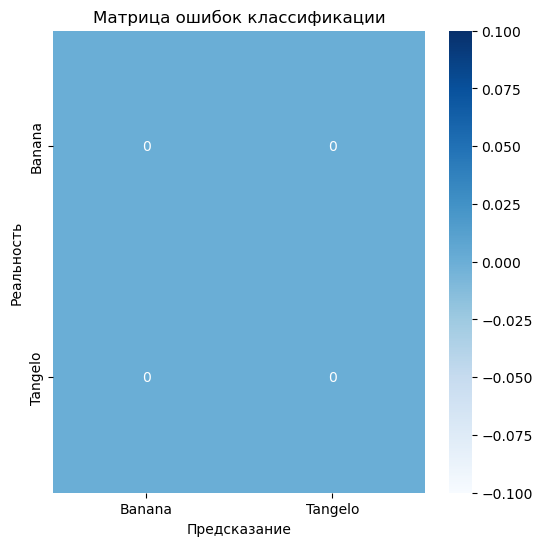

In [12]:
# Формируем список истинных меток классов
# Для каждого элемента из results['Banana'] присваиваем метку 'Banana'
# Для каждого элемента из results['Tangelo'] присваиваем метку 'Tangelo'
y_true = ['Banana'] * len(results['Banana']) + ['Tangelo'] * len(results['Tangelo'])

# Формируем список предсказанных меток
# Если элемент в results['Banana'] равен True — предсказан 'Banana', иначе — 'Tangelo'
# Если элемент в results['Tangelo'] равен True — предсказан 'Tangelo', иначе — 'Banana'
y_pred = ['Banana' if x else 'Tangelo' for x in results['Banana']] + \
         ['Tangelo' if x else 'Banana' for x in results['Tangelo']]

# Строим матрицу ошибок с указанием порядка меток (важно для правильного отображения)
cm = confusion_matrix(y_true, y_pred, labels=['Banana', 'Tangelo'])

# Создаём фигуру для отображения тепловой карты
plt.figure(figsize=(6, 6))  # Устанавливаем размер изображения

# Строим тепловую карту с аннотациями и цветовой схемой Blues
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Banana', 'Tangelo'],  # Подписи по оси X
            yticklabels=['Banana', 'Tangelo'])  # Подписи по оси Y

# Подписываем оси и заголовок
plt.xlabel('Предсказание')          # Ось X — предсказанные значения
plt.ylabel('Реальность')            # Ось Y — истинные значения
plt.title('Матрица ошибок классификации')  # Заголовок графика

# Отображаем график
plt.show()


In [ ]:
##

Матрица ошибок:
[[2 1]
 [1 3]]
TN: 2, FP: 1, FN: 1, TP: 3
Ошибка I рода (False Positive Rate): 0.33
Ошибка II рода (False Negative Rate): 0.25


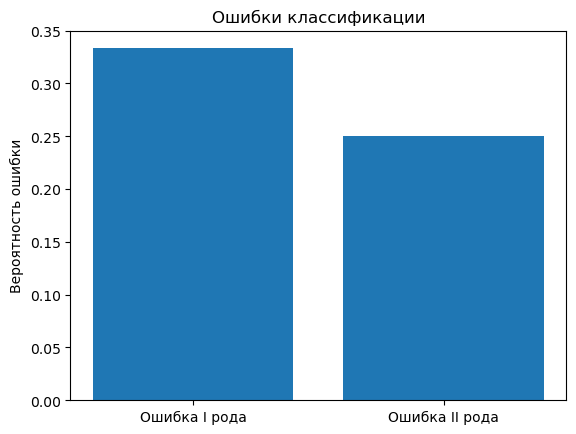

In [13]:
# Импортируем модуль sys для изменения путей поиска модулей
import sys
# Добавляем путь к установленным пакетам Python (актуально при использовании виртуального окружения)
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")

# Импортируем необходимые библиотеки
from sklearn.metrics import confusion_matrix  # Для вычисления матрицы ошибок
import matplotlib.pyplot as plt               # Для построения графиков

# Пример истинных и предсказанных меток классов (можно заменить на реальные данные)
y_true = [0, 1, 0, 1, 1, 0, 1]  # Истинные метки (настоящие классы объектов)
y_pred = [0, 1, 0, 0, 1, 1, 1]  # Предсказания модели

# Вычисляем матрицу ошибок
# Матрица ошибок будет иметь вид:
# [[TN, FP],
#  [FN, TP]]
cm = confusion_matrix(y_true, y_pred)

# Распаковываем значения из матрицы в переменные:
# TN — истинно-негативные, FP — ложно-положительные
# FN — ложно-негативные, TP — истинно-положительные
tn, fp, fn, tp = cm.ravel()

# Вычисляем ошибку I рода (False Positive Rate)
# Это доля объектов, которые по факту отрицательные, но модель ошибочно отнесла к положительным
denominator_I = fp + tn  # Общее количество реально отрицательных объектов
error_I = fp / denominator_I if denominator_I != 0 else 0.0  # Проверка деления на ноль

# Вычисляем ошибку II рода (False Negative Rate)
# Это доля объектов, которые по факту положительные, но модель ошибочно отнесла к отрицательным
denominator_II = fn + tp  # Общее количество реально положительных объектов
error_II = fn / denominator_II if denominator_II != 0 else 0.0  # Проверка деления на ноль

# Выводим результаты в консоль
print(f"Матрица ошибок:\n{cm}")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f"Ошибка I рода (False Positive Rate): {error_I:.2f}")
print(f"Ошибка II рода (False Negative Rate): {error_II:.2f}")

# Визуализируем ошибки I и II рода в виде столбчатой диаграммы
plt.bar(['Ошибка I рода', 'Ошибка II рода'], [error_I, error_II])  # Столбцы с подписями
plt.title('Ошибки классификации')                                 # Заголовок графика
plt.ylabel('Вероятность ошибки')                                  # Подпись оси Y
plt.show()  # Отображение графика
